# Data Challenge 2
## Kendall Hoover


#### The Problem

Yammer is a social network for coworkers to communicate with each other. It is free to use indefinitely, but companies must pay license fees in order to gain access to administrative controls.

Every week, the number of engaged users are calculated. By Yammer's definition, __engaged users__ are those who have some type of server call by interacting with the product. Thus, each point on the provided graph is the number of users who have logged at least one engagement event during the week of the starting date. 

Since April 28, 2014, the number of active users has been increasing. However, there was a significant drop in users on August 4, 2014, which is the week after July 28, 2014, which the date of the maximum number of active users. The number of active users has been decreasing ever since. Did something happen between July 28 and August 4, 2014 to cause a drop in active users?

Some potential reasons for a decrease in user engagement could be due to (1) an event that takes users away from being engaged or (2) a broken product feature.

#### Exploring the Data

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Loading the data into a dataframe
users=pd.read_csv("yammer_users.csv") #Information about the users
events=pd.read_csv("yammer_events.csv") #Engagement events
emails=pd.read_csv("yammer_emails.csv") #Events specific to sending emails
rollup_periods=pd.read_csv("dimension_rollup_periods.csv") #Creating rolling time periods

In [3]:
users.head()

,user_id,created_at,company_id,language,activated_at,state
0,0.0,2013-01-01 20:59:39,5737.0,english,2013-01-01 21:01:07,active
1,1.0,2013-01-01 13:07:46,28.0,english,NaN,pending
2,2.0,2013-01-01 10:59:05,51.0,english,NaN,pending
3,3.0,2013-01-01 18:40:36,2800.0,german,2013-01-01 18:42:02,active
4,4.0,2013-01-01 14:37:51,5110.0,indian,2013-01-01 14:39:05,active


In [4]:
events.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0


In [5]:
emails.head()

,user_id,occurred_at,action,user_type
0,0.0,2014-05-06 09:30:00,sent_weekly_digest,1.0
1,0.0,2014-05-13 09:30:00,sent_weekly_digest,1.0
2,0.0,2014-05-20 09:30:00,sent_weekly_digest,1.0
3,0.0,2014-05-27 09:30:00,sent_weekly_digest,1.0
4,0.0,2014-06-03 09:30:00,sent_weekly_digest,1.0


In [6]:
rollup_periods.head()

,period_id,time_id,pst_start,pst_end,utc_start,utc_end
0,1.0,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-01 08:00:00,2013-01-02 08:00:00
1,1.0,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-02 08:00:00,2013-01-03 08:00:00
2,1.0,2013-01-03 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-03 08:00:00,2013-01-04 08:00:00
3,1.0,2013-01-04 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-04 08:00:00,2013-01-05 08:00:00
4,1.0,2013-01-05 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-05 08:00:00,2013-01-06 08:00:00


#### Hypothesis 1: The reduction in engaged users is caused by an event preventing users from being engaged.

While there is no United States holiday during this time period, there are holidays within this time period in smaller countries, such as Morroco and Peru. It will be important to look at the makeup of the state of the users, as well as more information on the active users.

In [7]:
#Finding the number of active users
users.loc[users['state'] == 'active'].count()

user_id         9381
created_at      9381
company_id      9381
language        9381
activated_at    9381
state           9381
dtype: int64

In [8]:
#Finding the number of pending users
users.loc[users['state'] == 'pending'].count()

user_id         9685
created_at      9685
company_id      9685
language        9685
activated_at       0
state           9685
dtype: int64

There are 9381 active users and 9685 pending users. Next, where do the active users live? This will provide insight as to whether there is a national holiday.

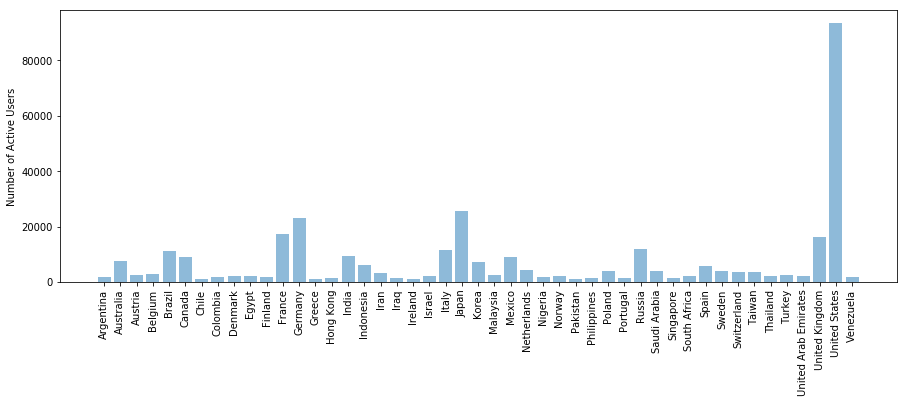

In [9]:
#Finding the number of active users per country
users_events = pd.merge(users,
                 events[['user_id', 'location']],
                 on='user_id')
users_events_active = users_events.loc[users_events['state'] == 'active']
unique_elements, counts_elements = np.unique(users_events_active['location'], return_counts=True)

plt.figure(figsize=(15,5))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Number of Active Users')
plt.show()

Most of the active users (over 8,000) are from the United States. Some other countries with around 2,000 active users are Japan, Germany, and France. There are no national holidays during this week in these countries.

However, the end of July/beginning of August is a good time for a vacation in these countries. Next, to determine if the drop in engagement was due to an increase in active users vacationing, we can look at the rate of an activity. What are the activities having to do with emails?

In [10]:
#Looking at the email activity
emails['action'].unique()

array(['sent_weekly_digest', 'email_open', 'email_clickthrough',
       'sent_reengagement_email'], dtype=object)

Out of the action options for email activity, opening emails is a good assessment of email activity of the active users.

In [11]:
#Creating a new table of opening email activity
email_open = emails.loc[emails['action'] == 'email_open']
email_open['occurred_at'] = pd.to_datetime(email_open['occurred_at'])
email_open = email_open.set_index(['occurred_at'])
email_open = email_open.drop(['user_id','action','user_type'], axis=1)
email_open['count']=1
email_open.head()

/Users/kendallhoover/miniconda3/envs/insightproject/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count
occurred_at,
2014-06-03 09:30:25,1
2014-06-10 09:30:24,1
2014-06-17 09:30:23,1
2014-07-29 09:30:35,1
2014-08-19 09:30:38,1


In [12]:
#Resampling the table of email openings weekly
email_open = email_open['count'].resample('W', how='sum')

/Users/kendallhoover/miniconda3/envs/insightproject/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [13]:
email_open.head()

occurred_at
2014-05-04     332
2014-05-11     919
2014-05-18     971
2014-05-25     995
2014-06-01    1026
Freq: W-SUN, Name: count, dtype: int64

Text(0, 0.5, 'Number of Emails Opened')

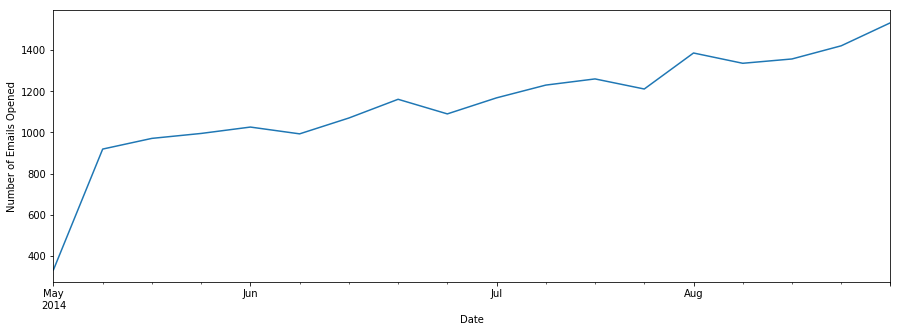

In [14]:
#Plotting the number of emails opened over time
plt.figure(figsize=(15,5))
email_open.plot.line()
plt.xlabel('Date')
plt.ylabel('Number of Emails Opened')

Interestingly, email opening activity was on the rise during this time period. This is opposite to what most likely happens when many users go on vacation.

#### Hypothesis 2: The decrease in engaged users is due to a feature failure or system break.

To determine if this decrease in engaged users is due to a feature failure, it is important to look at the other activity of the active users. Email clickthrough is another activity of engaged users.

In [15]:
#Creating a new table of email clickthrough
clickthrough = emails.loc[emails['action'] == 'email_clickthrough']
clickthrough['occurred_at'] = pd.to_datetime(clickthrough['occurred_at'])
clickthrough = clickthrough.set_index(['occurred_at'])
clickthrough = clickthrough.drop(['user_id','action','user_type'], axis=1)
clickthrough['count']=1
clickthrough.head()

/Users/kendallhoover/miniconda3/envs/insightproject/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,count
occurred_at,
2014-05-13 09:31:07,1
2014-05-20 09:31:00,1
2014-06-24 09:31:06,1
2014-07-01 09:30:41,1
2014-07-29 09:30:53,1


In [16]:
#Resampling the table of email clickthroughs weekly
clickthrough = clickthrough['count'].resample('W').sum()

Text(0, 0.5, 'Number of Email Clickthroughs')

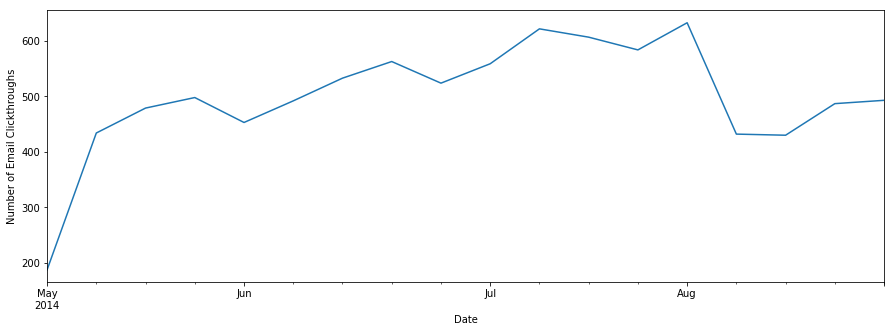

In [17]:
#Plotting the number of emails opened over time
plt.figure(figsize=(15,5))
clickthrough.plot.line()
plt.xlabel('Date')
plt.ylabel('Number of Email Clickthroughs')

The user email clickthroughs also decreased during this time period of user engagement decrease. It is important to next analyze specific events more closely.

In [18]:
#Creating a new table of events
new_events = events.loc[events['event_type'] == 'engagement']
new_events['occurred_at'] = pd.to_datetime(new_events['occurred_at'])
new_events = new_events.set_index(['occurred_at'])
new_events = new_events.drop(['user_id','event_type','location','device','user_type'], axis=1)
new_events['count']=1
new_events.head()

/Users/kendallhoover/miniconda3/envs/insightproject/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,event_name,count
occurred_at,,
2014-05-02 11:02:39,login,1
2014-05-02 11:02:53,home_page,1
2014-05-02 11:03:28,like_message,1
2014-05-02 11:04:09,view_inbox,1
2014-05-02 11:03:16,search_run,1


In [19]:
new_events.event_name.unique()

array(['login', 'home_page', 'like_message', 'view_inbox', 'search_run',
       'send_message', 'search_autocomplete', 'search_click_result_10',
       'search_click_result_7', 'search_click_result_8',
       'search_click_result_1', 'search_click_result_3',
       'search_click_result_2', 'search_click_result_5',
       'search_click_result_6', 'search_click_result_9',
       'search_click_result_4'], dtype=object)

In [20]:
#Splitting events table into smaller events tables
new_events_login = new_events.loc[new_events['event_name'] == 'login']
new_events_home_page = new_events.loc[new_events['event_name'] == 'home_page']
new_events_like_message = new_events.loc[new_events['event_name'] == 'like_message']
new_events_view_inbox = new_events.loc[new_events['event_name'] == 'view_inbox']
new_events_search_run = new_events.loc[new_events['event_name'] == 'search_run']
new_events_search_autocomplete = new_events.loc[new_events['event_name'] == 'search_autocomplete']
new_events_search_click_result_1 = new_events.loc[new_events['event_name'] == 'search_click_result_1']
new_events_search_click_result_2 = new_events.loc[new_events['event_name'] == 'search_click_result_2']
new_events_search_click_result_3 = new_events.loc[new_events['event_name'] == 'search_click_result_3']
new_events_search_click_result_4 = new_events.loc[new_events['event_name'] == 'search_click_result_4']
new_events_search_click_result_5 = new_events.loc[new_events['event_name'] == 'search_click_result_5']
new_events_search_click_result_6 = new_events.loc[new_events['event_name'] == 'search_click_result_6']
new_events_search_click_result_7 = new_events.loc[new_events['event_name'] == 'search_click_result_7']
new_events_search_click_result_8 = new_events.loc[new_events['event_name'] == 'search_click_result_8']
new_events_search_click_result_9 = new_events.loc[new_events['event_name'] == 'search_click_result_9']
new_events_search_click_result_10 = new_events.loc[new_events['event_name'] == 'search_click_result_10']

In [21]:
#Resampling these new events tables weekly
new_events_login = new_events_login['count'].resample('W').sum()
new_events_home_page = new_events_home_page['count'].resample('W').sum()
new_events_like_message = new_events_like_message['count'].resample('W').sum()
new_events_view_inbox = new_events_view_inbox['count'].resample('W').sum()
new_events_search_run = new_events_search_run['count'].resample('W').sum()
new_events_search_autocomplete = new_events_search_autocomplete['count'].resample('W').sum()
new_events_search_click_result_1 = new_events_search_click_result_1['count'].resample('W').sum()
new_events_search_click_result_2 = new_events_search_click_result_2['count'].resample('W').sum()
new_events_search_click_result_3 = new_events_search_click_result_3['count'].resample('W').sum()
new_events_search_click_result_4 = new_events_search_click_result_4['count'].resample('W').sum()
new_events_search_click_result_5 = new_events_search_click_result_5['count'].resample('W').sum()
new_events_search_click_result_6 = new_events_search_click_result_6['count'].resample('W').sum()
new_events_search_click_result_7 = new_events_search_click_result_7['count'].resample('W').sum()
new_events_search_click_result_8 = new_events_search_click_result_8['count'].resample('W').sum()
new_events_search_click_result_9 = new_events_search_click_result_9['count'].resample('W').sum()
new_events_search_click_result_10 = new_events_search_click_result_10['count'].resample('W').sum()

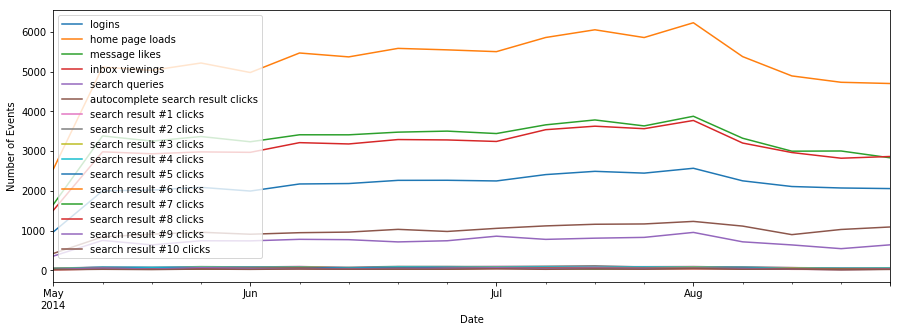

In [22]:
#Plotting the number of various email activities over time
plt.figure(figsize=(15,5))
new_events_login.plot.line(label='logins')
new_events_home_page.plot.line(label='home page loads')
new_events_like_message.plot.line(label='message likes')
new_events_view_inbox.plot.line(label='inbox viewings')
new_events_search_run.plot.line(label='search queries')
new_events_search_autocomplete.plot.line(label='autocomplete search result clicks')
new_events_search_click_result_1.plot.line(label='search result #1 clicks')
new_events_search_click_result_2.plot.line(label='search result #2 clicks')
new_events_search_click_result_3.plot.line(label='search result #3 clicks')
new_events_search_click_result_4.plot.line(label='search result #4 clicks')
new_events_search_click_result_5.plot.line(label='search result #5 clicks')
new_events_search_click_result_6.plot.line(label='search result #6 clicks')
new_events_search_click_result_7.plot.line(label='search result #7 clicks')
new_events_search_click_result_8.plot.line(label='search result #8 clicks')
new_events_search_click_result_9.plot.line(label='search result #9 clicks')
new_events_search_click_result_10.plot.line(label='search result #10 clicks')


plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend(loc='upper left')

Looking at this data, there is a decrease in the following events during the timeframe of interest: loading of the home page, logging into Yammer, viewing email inboxes, liking a message, performing a search query, and clicking on the 9th search result. Thus, the decrease in the email clickthrough rates is a cause of a decrease in user engagement. 

__I recommend that we look into these email links to ensure there are not any issues.__